In [1]:
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv("./X.csv")

In [3]:
d = d.iloc[:,1:]

In [4]:
all_num = []
for col in d.columns:
    tmp = d[col][d[col]!=0]
    for item in tmp:
        all_num.append(item)

In [5]:
len(all_num)

261072

In [6]:
t = pd.read_csv("./tags_counts_rank.csv")

In [7]:
sum(t['count'])

261290

In [8]:
len(t)

3882

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47410 entries, 0 to 47409
Columns: 3882 entries, person to tapir
dtypes: float64(3882)
memory usage: 1.4 GB


In [10]:
freq = []
for col in d.columns:
    tmp = d[col][d[col]!=0]
    freq.append(len(tmp))

In [11]:
sum(freq)

261072

In [12]:
set(list(t['count'])) - set(freq)

{362}

In [13]:
min(all_num)

0.50000124999999995

In [14]:
max(all_num)

0.9941411

In [15]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127815d0>]], dtype=object)

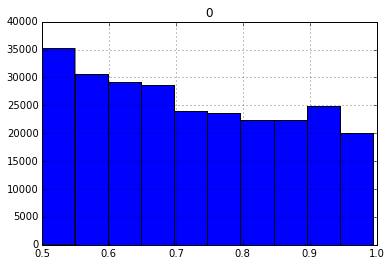

In [16]:
pd.DataFrame(all_num).hist()

In [17]:
tmp = pd.DataFrame(all_num,columns=['value'])

In [18]:
tmp.to_csv("./scores_all.csv",index=False)

In [19]:
tags = t[t['count'] > 50]

In [20]:
del tags['Unnamed: 0']

In [21]:
np.arange(0.5,1.1,.1)

array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1])

In [22]:
vectors = []

for tag in tags.tag:
    vector = []
    tmp = d[tag][d[tag]!=0]
    tmp = pd.cut(tmp,np.arange(0.5,1.1,.1),labels=False)
    
    for i in range(5):
        vector.append(sum(tmp==i))
    
    vectors.append(vector)

In [23]:
hists = pd.DataFrame(np.vstack(vectors))

In [24]:
def inf_norm(x):
    return x/max(x)

In [25]:
hists_normed = hists.apply(inf_norm,axis=1)

In [26]:
hists_normed['tag'] = tags.tag

In [27]:
hists_normed.to_csv("./hists.csv",index=False)

In [28]:
import glob
import os

In [29]:
DIR = "/Users/damoncrockett/Desktop/stpete/viz/hists/"

In [30]:
imgs = []
for file in glob.glob(os.path.join(DIR,"*.jpg")):
    imgs.append(file)

In [31]:
tmp = pd.DataFrame(imgs,columns=['local_path'])

In [32]:
tmp['tag'] = tmp.local_path.map(lambda x: os.path.basename(x)[:-4])

In [33]:
tmp.set_index("tag",inplace=True)

In [34]:
hists_normed = hists_normed.join(tmp,on='tag')

In [35]:
hists_normed.to_csv("./hists_imgs.csv",index=False)

In [40]:
imgs

['/Users/damoncrockett/Desktop/stpete/viz/hists/abdomen.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/acoustic guitar.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/acrylic paint.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/action figure.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/adventure.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/advertising.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/afterglow.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/air force.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/air travel.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/aircraft.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/airline.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/airliner.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/airplane.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/airport terminal.jpg',
 '/Users/damoncrockett/Desktop/stpete/viz/hists/airport.jpg',
 '/Users/damoncrockett/De